In [17]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("startup_cities.csv")

# Data Cleaning
df = df.dropna(subset=['city', 'quantity score', 'quality score', 'business score'])


# Select relevant fields/attributes
columns_to_use = ["quantity score", "quality score", "business score"]
df_selected = df[["city", "country"] + columns_to_use].copy()  # Create an explicit copy

# Scale the scores using StandardScaler
scaler = StandardScaler()
df_selected.loc[:, columns_to_use] = scaler.fit_transform(df_selected[columns_to_use]) #use loc to avoid the warning.

# Compute similarity matrix
similarity_matrix = cosine_similarity(df_selected[columns_to_use])

# Convert to DataFrame for better readability
similarity_df = pd.DataFrame(similarity_matrix, index=df_selected["city"], columns=df_selected["city"])

# Define query cities
query_cities = ['San Francisco', 'Tokyo', 'Seoul']

# Find top 10 most similar cities for each query
for city in query_cities:
    print(f"\nTop 10 similar cities to {city}:")
    
    similar_cities = similarity_df[city].sort_values(ascending=False)[1:11]
    
    for similar_city_name, similarity_score in similar_cities.items():
        country = df_selected[df_selected["city"] == similar_city_name]["country"].values[0]
        print(f"{similar_city_name:<25} {country:<20} {similarity_score:.4f}")



Top 10 similar cities to San Francisco:
Beijing                    China               0.9873
New York                   United States       0.9870
Shanghai                   China               0.9691
Boston Area                United States       0.9218
Shenzhen                   China               0.8843
Los Angeles Area           United States       0.8801
Jakarta                    Indonesia           0.8782
Bangalore                  India               0.8550
Tel Aviv Area              Israel              0.8415
Sao Paulo                  Brazil              0.8373

Top 10 similar cities to Tokyo:
Seattle                    United States       0.9935
Austin                     United States       0.9795
San Diego                  United States       0.9790
Seoul                      South Korea         0.9777
Berlin                     Germany             0.9734
Washington DC Area         United States       0.9703
Shenzhen                   China               0.9692
Amsterda

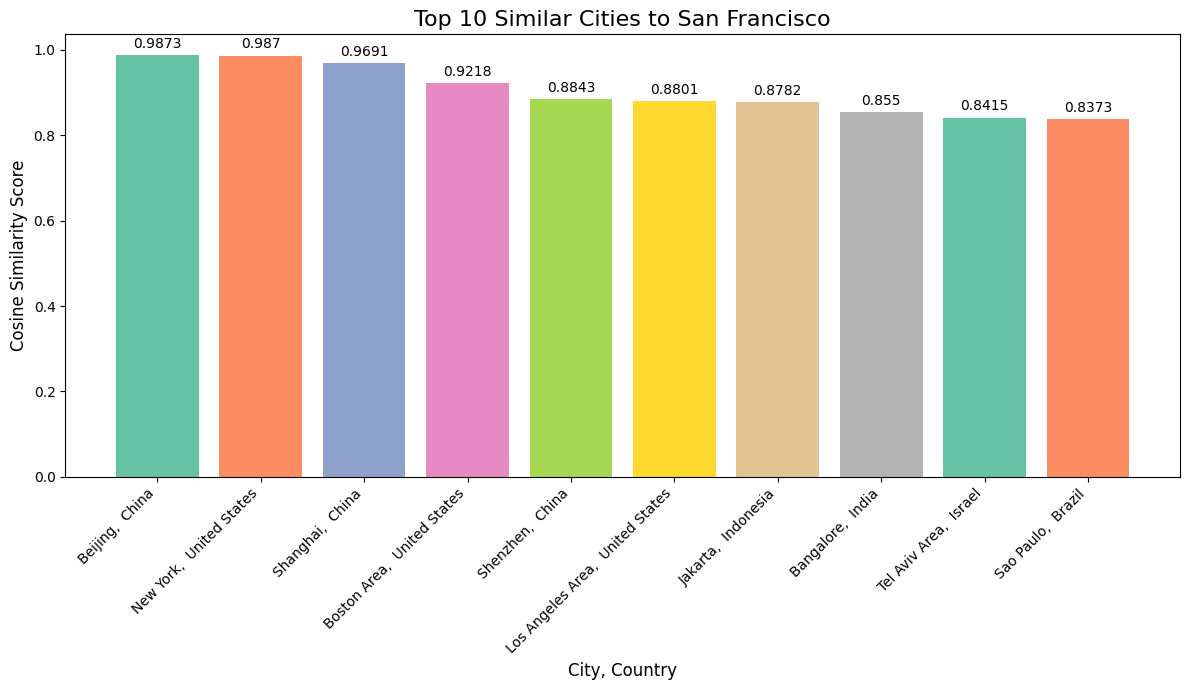

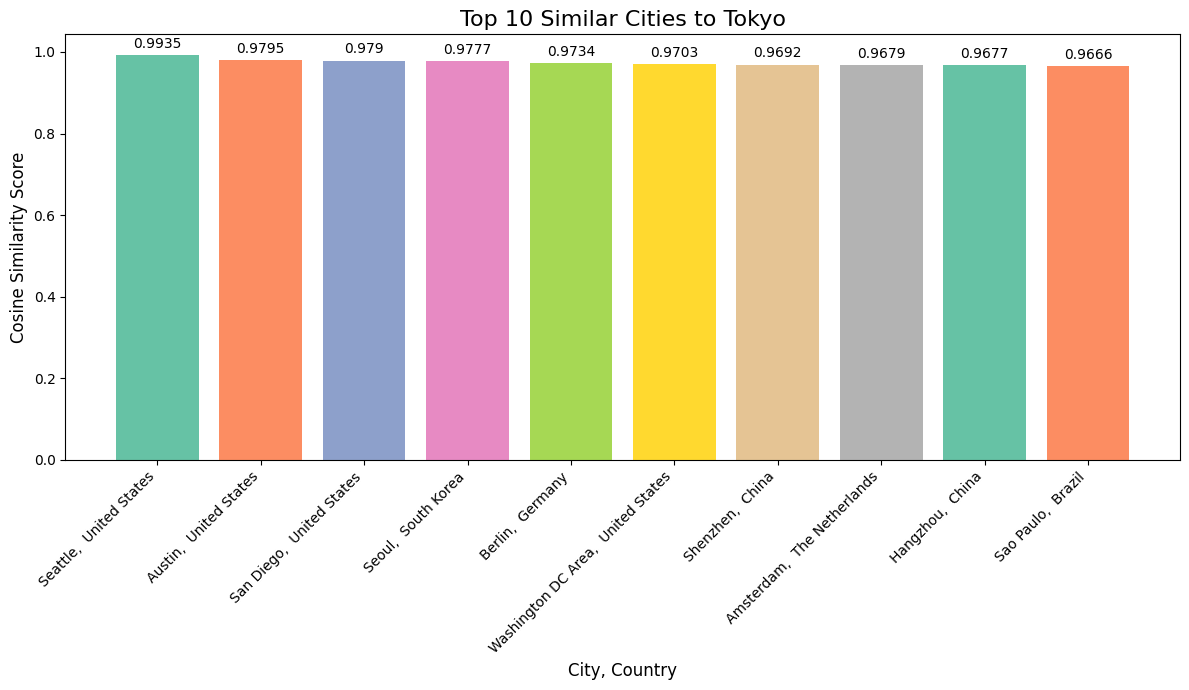

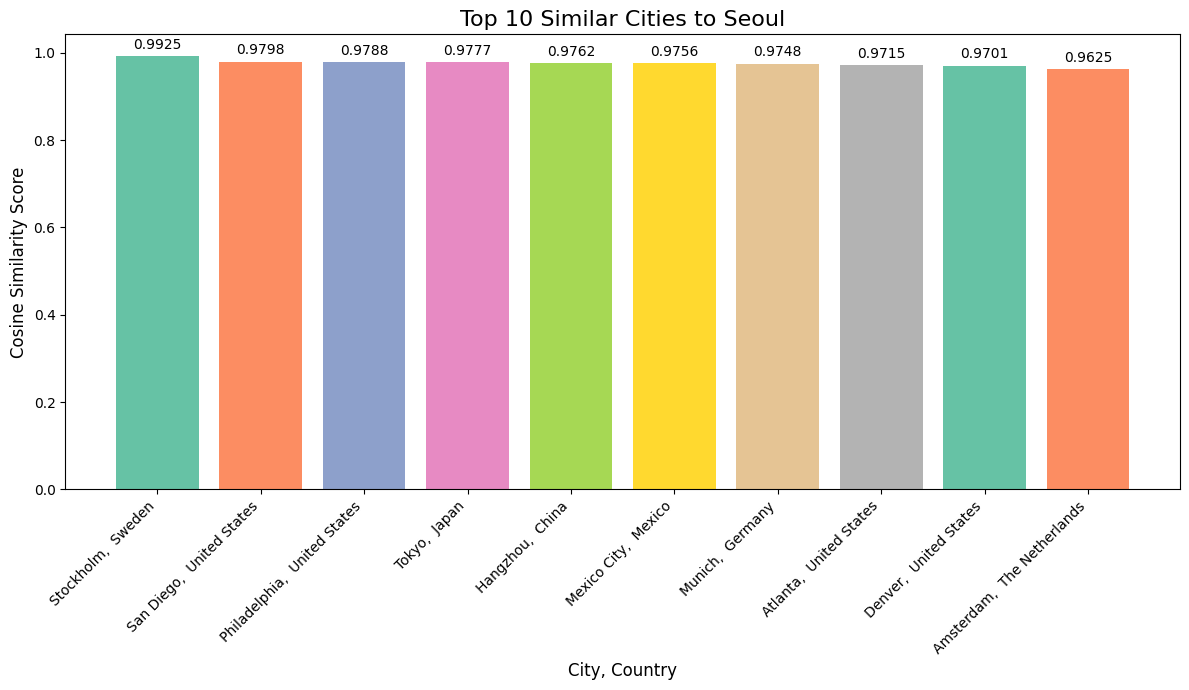

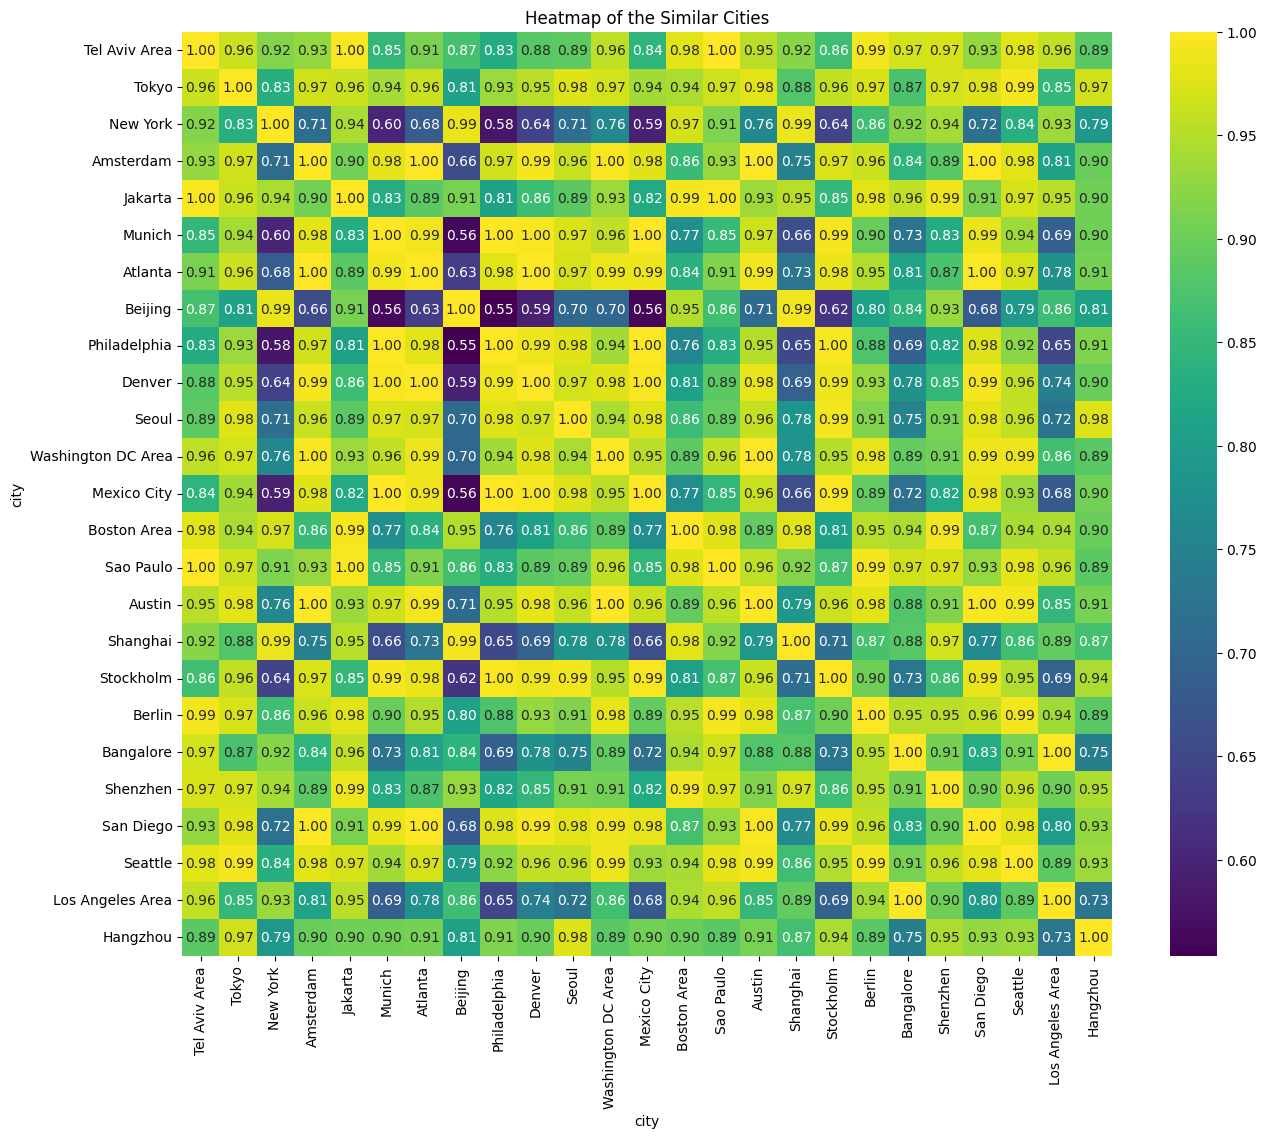

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


# Create tables and graphs for each query
for city in query_cities:
    results_df = get_top_similar_cities(city, similarity_df, df_selected)
    
    # Bar graph output
    plt.figure(figsize=(12, 7))  # Increase figure size
    
    # Create combined city and country labels
    combined_labels = [f"{row['City']}, {row['Country']}" for _, row in results_df.iterrows()]
    
    bars = plt.bar(combined_labels, results_df["Similarity Score"], color=sns.color_palette("Set2")) #use a nicer color palette.
    
    # Add value labels to bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')
    
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Top 10 Similar Cities to {city}", fontsize=16) #more descriptive title.
    plt.xlabel("City, Country", fontsize=12) #more descriptive x label
    plt.ylabel("Cosine Similarity Score", fontsize=12) #more descriptive y label
    plt.tight_layout()
    plt.show()


# Collect all 30 similar cities
similar_cities_list = []
for city in query_cities:
    similar_cities_df = get_top_similar_cities(city, similarity_df, df_selected)
    similar_cities_list.extend(similar_cities_df["City"].tolist())

# Remove duplicates from the list of similar cities
unique_similar_cities = list(set(similar_cities_list))

# Create a subset of the similarity matrix
subset_similarity_df = similarity_df.loc[unique_similar_cities, unique_similar_cities]

# Heatmap of the Similar Cities
plt.figure(figsize=(15, 12))
sns.heatmap(subset_similarity_df, annot=True, fmt=".2f", cmap="viridis")
plt.title("Heatmap of the Similar Cities")
plt.show()